In [1]:
# Ex 2.4
# This is an exercise on identifying autocorrelation patterns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import List
from typing import Dict
from pandas.plotting import autocorrelation_plot

In [2]:
def acf(ts, lag):
    n = len(ts)
    ts = np.asarray(ts)
    
    m = np.mean(ts)
    
    y1 = ts[ : n - lag]
    y2 = ts[lag : ]
    
    cov = np.sum((y1 - m) * (y2 - m)) 
    var = np.sum((ts - m)**2) 
    
    return cov / float(var)

def calculate_acfs(ts, max_lag):
    res = [(i, acf(ts, i)) for i in range(0, max_lag + 1)]
    return res

def plot_acf(ts, max_lag):
    points = calculate_acfs(ts, max_lag)
    
    lags = [l for (l, _) in points]
    acfs = [a for (_, a) in points]
    plt.stem(lags, acfs)
    
    cf = 1.96 / np.sqrt(len(ts))
    
    plt.ylim((-1.0, 1.0))
    plt.grid()
    
    plt.axhline(y=cf, color='gray')
    plt.axhline(y=-cf, color='gray')
    plt.axhline(color='black')
    
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    
    plt.xticks(range(0, max_lag, 10))
   
    plt.show()


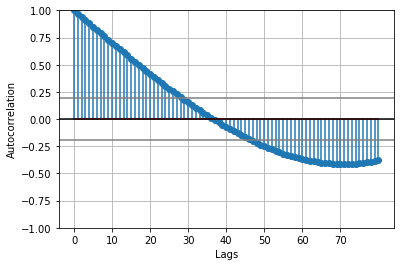

In [4]:
y = [5 + 3 * x for x in range(0, 100)]

ts1 = pd.Series(y)
plot_acf(ts1, max_lag=80)

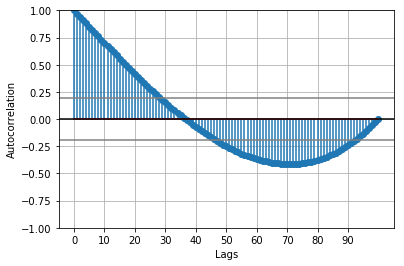

In [5]:
plot_acf(y, max_lag=100)

In [6]:
y_2 = []
for i in range(0, 100):
    if i % 2 == 0:
        y_2.append(3 + 5 * i)
    else:
        y_2.append(i**2 /10.0)


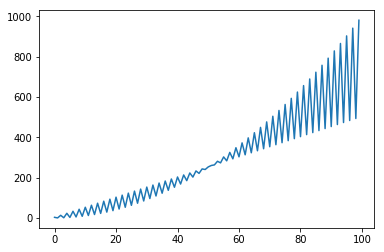

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(0, 100), y_2)
plt.show()

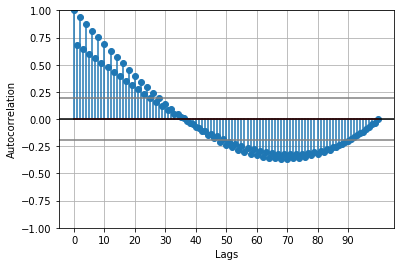

In [8]:
plot_acf(y_2, 100)

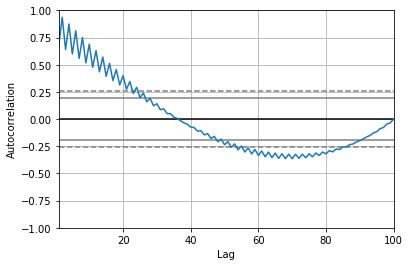

In [9]:
autocorrelation_plot(pd.Series(y_2))
plt.show()

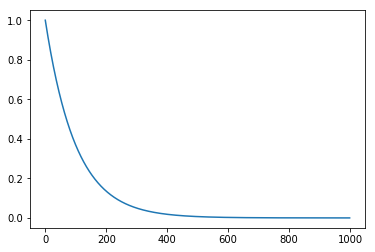

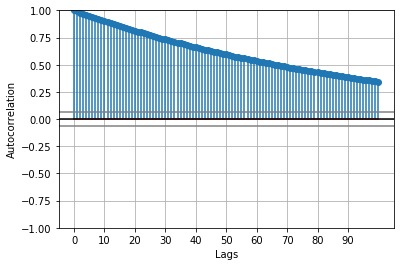

In [10]:
y_3 = [np.exp(-x/100.0) for x in np.arange(0.0, 1000.0, 1)]
plt.plot([x for x in np.arange(0.0, 1000.0)], y_3)
plt.show()

plot_acf(y_3, max_lag=100)

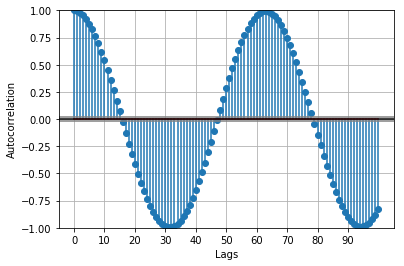

In [11]:
y_4 = [np.sin(x) for x in np.arange(0.0, 1000.0, 0.1)]
plot_acf(y_4, max_lag=100)

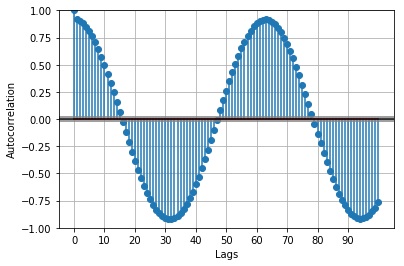

In [12]:
y_5 = [np.sin(x) + np.cos(x) + np.random.random() for x in np.arange(0.0, 1000.0, 0.1)]
plot_acf(y_5, max_lag=100)